<a href="https://colab.research.google.com/github/Romema1/Romema1/blob/main/Answer%20Assignment%203%20ISE%20571_PartII_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Part II problem (2)

In [ ]:
!pip install pymoo

In [ ]:
# solving problem 2 using pymoo library with example and output


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -
     2 |      200 |      1 |  3.000000E+03 |         ideal
     3 |      300 |      1 |  3.000000E+04 |         ideal
     4 |      400 |      3 |  0.000000E+00 |             f
     5 |      500 |     11 |  0.000000E+00 |             f
     6 |      600 |     31 |  0.000000E+00 |             f
     7 |      700 |     82 |  0.000000E+00 |             f
     8 |      800 |    100 |  0.000000E+00 |             f
     9 |      900 |    100 |  0.000000E+00 |             f
    10 |     1000 |    100 |  0.000000E+00 |             f
    11 |     1100 |    100 |  0.000000E+00 |             f
    12 |     1200 |    100 |  0.000000E+00 |             f
    13 |     1300 |    100 |  0.000000E+00 |             f
    14 |     1400 |    100 |  0.000000E+00 |             f
    15 |     1500 |    100 |  0.000000E+00 |             f
    16 |     1600 |    100 |  0.000000E+00 |            

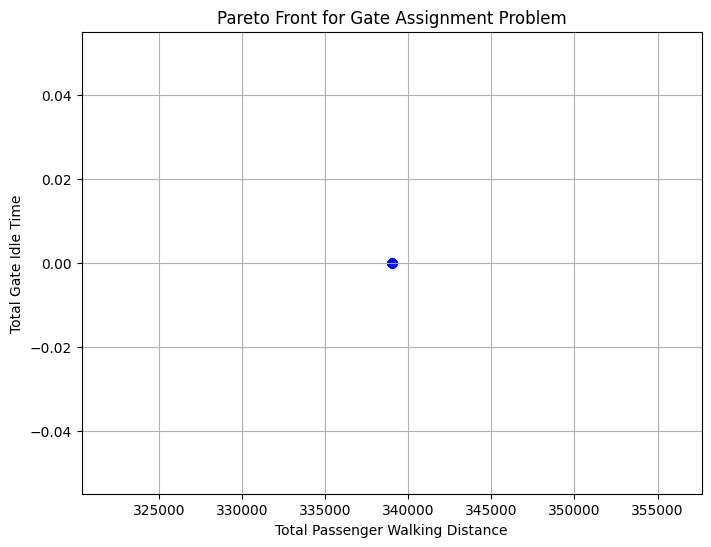

In [ ]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import matplotlib.pyplot as plt

# =============================================================================
# Placeholder Data (Replace these values with actual data if desired)
# =============================================================================

# Number of arriving aircraft and available gates
N = 8      # e.g., number of aircraft
G = 4      # e.g., number of gates

# Predefined Parameters for each aircraft (dummy values):
# Arrival times (t_i) and departure times (d_i)
t = np.array([10, 20, 30, 40, 50, 60, 70, 80])    # Example arrival times
d = np.array([15, 25, 35, 45, 55, 65, 75, 85])    # Example departure times

# Number of passengers on each aircraft (W_i)
W = np.array([100, 150, 200, 120, 180, 130, 110, 140])

# Walking distances for each gate (D_j) – for gates 1 through G
D = np.array([300, 400, 500, 600])

# =============================================================================
# Problem Formulation: Gate Assignment Problem using NSGA-II
# =============================================================================
#
# Decision Variables:
#   x = [x_1, x_2, ..., x_N] where each x_i is an integer in {1, 2, ..., G}
#   representing the gate assigned to aircraft i.
#
# Objectives:
#   f1(x) = sum_i ( W_i * D_{x_i} )
#           (Total passenger walking distance)
#
#   f2(x) = sum_{j=1}^{G} sum_{k (consecutive flights at gate j)} max(0, t_{k+1} - d_k)
#           (Total gate idling time)
#

class GateAssignmentProblem(Problem):
    def __init__(self, N, G, t, d, W, D):
        # n_var = N (each aircraft gets a gate assignment)
        # n_obj = 2 (two objectives: walking distance and idle time)
        # Decision variables are integers between 1 and G.
        super().__init__(n_var=N,
                         n_obj=2,
                         n_constr=0,
                         xl=1,
                         xu=G,
                         vtype=int)
        self.N = N
        self.G = G
        self.t = t
        self.d = d
        self.W = W
        self.D = D

    def _evaluate(self, X, out, *args, **kwargs):
        n_solutions = X.shape[0]
        f1 = np.zeros(n_solutions)
        f2 = np.zeros(n_solutions)

        for i in range(n_solutions):
            sol = X[i, :]  # Candidate solution: an array of length N with values in {1,...,G}

            # Objective 1: Total Passenger Walking Distance
            total_distance = 0
            for j in range(self.N):
                gate = int(sol[j])  # Convert to Python int
                total_distance += self.W[j] * self.D[gate - 1]  # gate index offset by 1
            f1[i] = total_distance

            # Objective 2: Total Gate Idling Time
            idle_total = 0
            for gate in range(1, self.G + 1):
                indices = np.where(sol == gate)[0]  # Aircraft assigned to this gate
                if len(indices) <= 1:
                    continue  # No idle time if 0 or 1 flight at this gate
                # Sort these flights by arrival time
                sorted_idx = indices[np.argsort(self.t[indices])]
                for k in range(len(sorted_idx) - 1):
                    gap = max(0, self.t[sorted_idx[k+1]] - self.d[sorted_idx[k]])
                    idle_total += gap
            f2[i] = idle_total

        out["F"] = np.column_stack([f1, f2])

# =============================================================================
# NSGA-II Setup and Execution using pymoo
# =============================================================================

# Instantiate the problem with the placeholder data.
problem = GateAssignmentProblem(N, G, t, d, W, D)

# Set up the NSGA-II algorithm (population size can be tuned)
algorithm = NSGA2(pop_size=100)

# Run the optimization: here, we run for 200 generations.
res = minimize(problem,
               algorithm,
               termination=('n_gen', 200),
               seed=1,
               verbose=True)

# =============================================================================
# Display and Plot the Results
# =============================================================================

print("#" * 30)
print("Pareto-optimal Gate Assignment Solutions (Decision Variables):")
print(res.X)  # Each row is a candidate solution: an 8-element integer vector.

print("\nCorresponding Objective Values [Total Walking Distance, Total Gate Idle Time]:")
print(np.round(res.F, 2))

# Plot the Pareto front:
plt.figure(figsize=(8,6))
plt.scatter(res.F[:, 0], res.F[:, 1], c='blue', marker='o')
plt.xlabel('Total Passenger Walking Distance')
plt.ylabel('Total Gate Idle Time')
plt.title('Pareto Front for Gate Assignment Problem')
plt.grid(True)
plt.show()


In [ ]:
#Find the optimal solution for Problem2

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.4 MB/s eta 0:00:00


In [ ]:
# the optimal solution

In [ ]:
import pulp as pl

# ----------------------------
# Placeholder Data
# ----------------------------
# Number of arriving aircraft (N) and number of gates (G)
N = 8      # e.g., number of aircraft (assumed sorted by arrival time)
G = 4      # e.g., number of gates

# Predefined Parameters (replace with actual data if available)
# For each aircraft i (i = 1,...,N):
# Arrival times:   t_i
# Departure times: d_i
# Passenger counts: W_i
t = [10, 20, 30, 40, 50, 60, 70, 80]     # Arrival times
d = [15, 25, 35, 45, 55, 65, 75, 85]       # Departure times
W = [100, 150, 200, 120, 180, 130, 110, 140]  # Number of passengers

# For each gate j (j = 1,...,G):
# Walking distances from gate j to key locations: D_j
D = [300, 400, 500, 600]

# Weight for weighted-sum objective (0 <= lambda <= 1)
lam = 0.5

# ----------------------------
# MILP Formulation using PuLP
# ----------------------------
#
# Decision Variables:
#   For each aircraft i and each gate j, define a binary variable:
#       y[i,j] = 1 if aircraft i is assigned to gate j, 0 otherwise.
#
#   Each aircraft must be assigned to exactly one gate:
#       for all i: sum_{j=1}^{G} y[i,j] = 1.
#
# Objective 1: Total Passenger Walking Distance
#   f1 = sum_{i=1}^{N} sum_{j=1}^{G} (W_i * D_j * y[i,j])
#
# To model Gate Idling Time (Objective 2), we assume the aircraft are sorted by arrival time.
# For consecutive aircraft (i and i+1) that are assigned to the same gate,
#   the idle time is: gap_i = max(0, t_{i+1} - d_i).
#
# To capture this, we introduce binary variables:
#   For i = 1,...,N-1 and for each gate j:
#       z[i,j] = 1 if both aircraft i and i+1 are assigned to gate j, 0 otherwise.
#
# The constraints for z are:
#       z[i,j] <= y[i,j]
#       z[i,j] <= y[i+1,j]
#       z[i,j] >= y[i,j] + y[i+1,j] - 1.
#
# Then Objective 2 is:
#   f2 = sum_{i=1}^{N-1} (t_{i+1} - d_i) * (sum_{j=1}^{G} z[i,j])
#
# Finally, we minimize the weighted sum:
#       minimize lam * f1 + (1 - lam) * f2.
#

# Create the MILP model
prob = pl.LpProblem("Gate_Assignment", pl.LpMinimize)

# Binary variables y[i,j] for assignment: i = 0,...,N-1, j = 0,...,G-1
y = {(i, j): pl.LpVariable(f"y_{i}_{j}", cat=pl.LpBinary)
     for i in range(N) for j in range(G)}

# Each aircraft must be assigned to exactly one gate.
for i in range(N):
    prob += pl.lpSum([y[i, j] for j in range(G)]) == 1, f"Aircraft_{i}_assignment"

# Binary variables z[i,j] for consecutive assignment indicator (for i = 0,...,N-2)
z = {(i, j): pl.LpVariable(f"z_{i}_{j}", cat=pl.LpBinary)
     for i in range(N-1) for j in range(G)}

# Link z and y: for all i=0,...,N-2 and j=0,...,G-1
for i in range(N-1):
    for j in range(G):
        prob += z[i, j] <= y[i, j], f"z_le_y_{i}_{j}"
        prob += z[i, j] <= y[i+1, j], f"z_le_y_next_{i}_{j}"
        prob += z[i, j] >= y[i, j] + y[i+1, j] - 1, f"z_ge_ysum_{i}_{j}"

# Objective 1: Total Passenger Walking Distance
f1 = pl.lpSum([W[i] * D[j] * y[i, j] for i in range(N) for j in range(G)])

# Objective 2: Total Gate Idle Time
# (Assuming aircraft are sorted by arrival time: t[i] <= t[i+1])
f2 = pl.lpSum([(t[i+1] - d[i]) * pl.lpSum([z[i, j] for j in range(G)]) for i in range(N-1)])

# Combined weighted objective
prob += lam * f1 + (1 - lam) * f2, "Weighted_Objective"

# ----------------------------
# Solve the MILP model using PuLP's solver (e.g., CBC)
# ----------------------------
prob.solve()

# ----------------------------
# Display the Optimal Solution
# ----------------------------
print("Optimal Gate Assignment:")
for i in range(N):
    for j in range(G):
        if pl.value(y[i, j]) > 0.5:
            print(f"Aircraft {i+1} is assigned to Gate {j+1}")

print("\nObjective Values:")
print("Total Passenger Walking Distance (f1):", pl.value(f1))
print("Total Gate Idle Time (f2):", pl.value(f2))
print("Weighted Objective Value:", pl.value(prob.objective))


Optimal Gate Assignment:
Aircraft 1 is assigned to Gate 1
Aircraft 2 is assigned to Gate 1
Aircraft 3 is assigned to Gate 1
Aircraft 4 is assigned to Gate 1
Aircraft 5 is assigned to Gate 1
Aircraft 6 is assigned to Gate 1
Aircraft 7 is assigned to Gate 1
Aircraft 8 is assigned to Gate 1

Objective Values:
Total Passenger Walking Distance (f1): 339000.0
Total Gate Idle Time (f2): 35.0
Weighted Objective Value: 169517.5
